# importation

In [1]:
%load_ext autoreload
%autoreload 2

In [62]:
from cmath import nan
from matplotlib.collections import PathCollection
import pandas as pd
from os import path
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.optimize import curve_fit
from Plot import fit_sigm
from GM_analysisChipsDrugsAloneE9E11 import *

# Loading of the files

In [15]:
dfCis = readExcel(path.join("E9","Chips.xlsx"))
dfCisBarcode = readExcel(path.join("E9","Barcode.xlsx"))

dfEto = readExcel(path.join("E11","Chips.xlsx"))
dfEtoBarcode = readExcel(path.join("E11","Barcode.xlsx"))

#adding drugs data

In [16]:
dfEtoFull = addDataDrugsChips(dfEto,dfEtoBarcode,"Etoposide")
dfCisFull = addDataDrugsChips(dfCis,dfCisBarcode,"Cisplatin")

print(dfCisFull.control.unique())
print(dfEtoFull.control.unique())


['NaCl' False]
[False 'DMSO']


# FIltering values from wrong detections

In [17]:
dfCisFullFiltered,dfCtlCis = removeBadPoints(dfCisFull,ctlName="NaCl")

dfEtoFullFiltered,dfCtlEto = removeBadPoints(dfEtoFull,ctlName="DMSO")

# adding R0

In [18]:
dfR0Cis, dfCisFullFiltered = addR0(dfCisFullFiltered)
dfR0Eto, dfEtoFullFiltered = addR0(dfEtoFullFiltered)

dates:['210623' '210624' '210625' '210626' '210627']
dates:['210713' '210714' '210715' '210716' '210717']


# Plot IC50 with R0

[ 0.91463802  1.70631576 15.06375558  0.25152952]
[0.93142905 1.47805169 6.46017692 0.23146355]
[0.90936313 0.86683925 4.55196936 0.16640835]
[0.68537068 0.44670453 6.22806733 0.20160918]


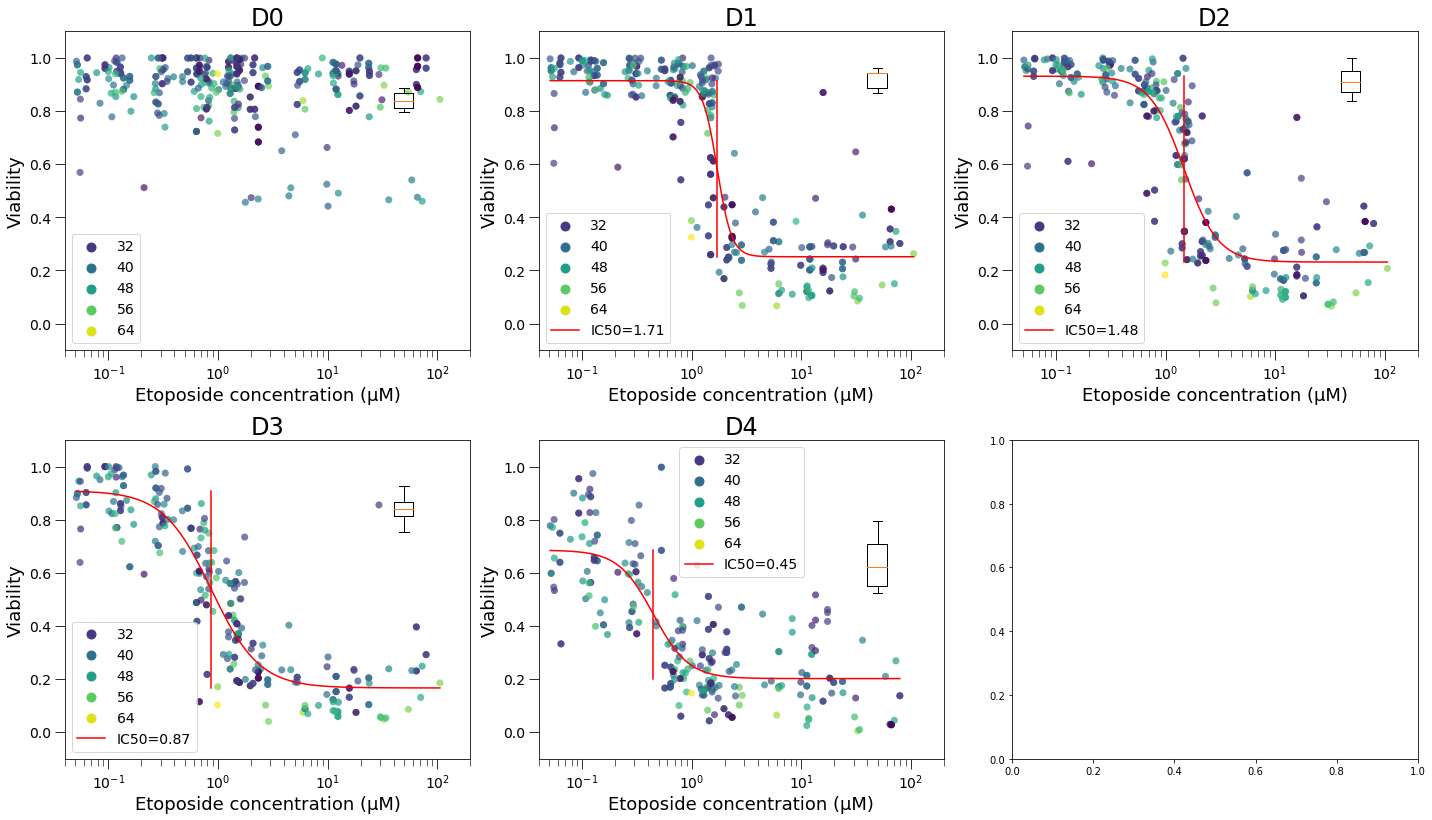

In [63]:

plot_Chip(dfEtoFullFiltered,save=True, xlab = "Etoposide concentration (µM)", fileName ="20221011_Chips_Etoposide_withFit_small_fromEcell",printFit = True)

[ 0.96554885 10.2069132   4.736621    0.4       ]
[0.92242635 1.58888391 6.36092214 0.23840148]
[0.8836719  1.046915   3.88466805 0.15159183]
[0.51656742 0.85830119 4.12609497 0.19017563]


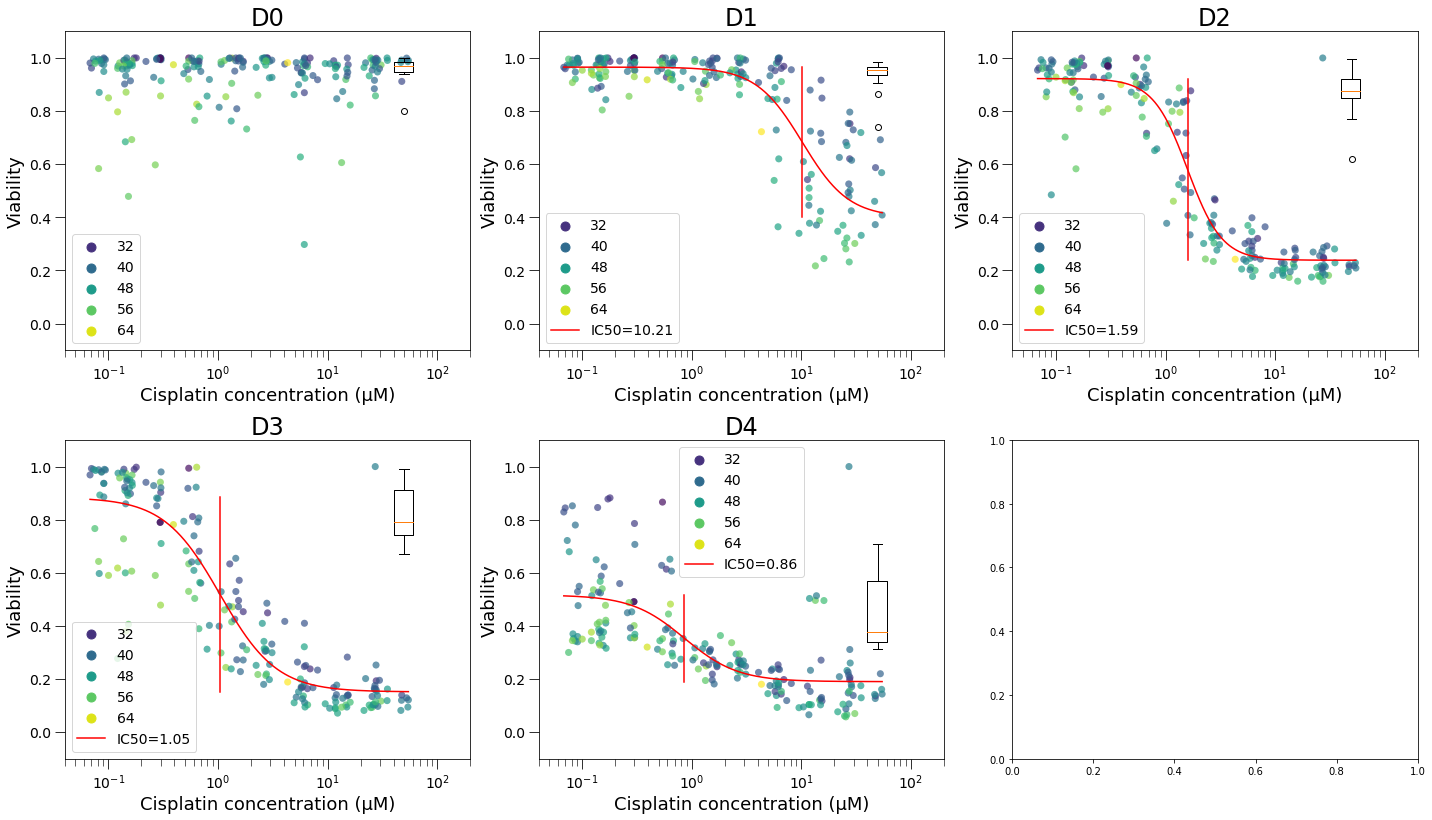

In [64]:
plot_Chip(dfCisFullFiltered,save=True, xlab = "Cisplatin concentration (µM)", fileName ="20221011_Chips_Cisplatin_withFit_small_fromExcel",printFit = True)

[0.92242635 1.58888391 6.36092214 0.23840148]


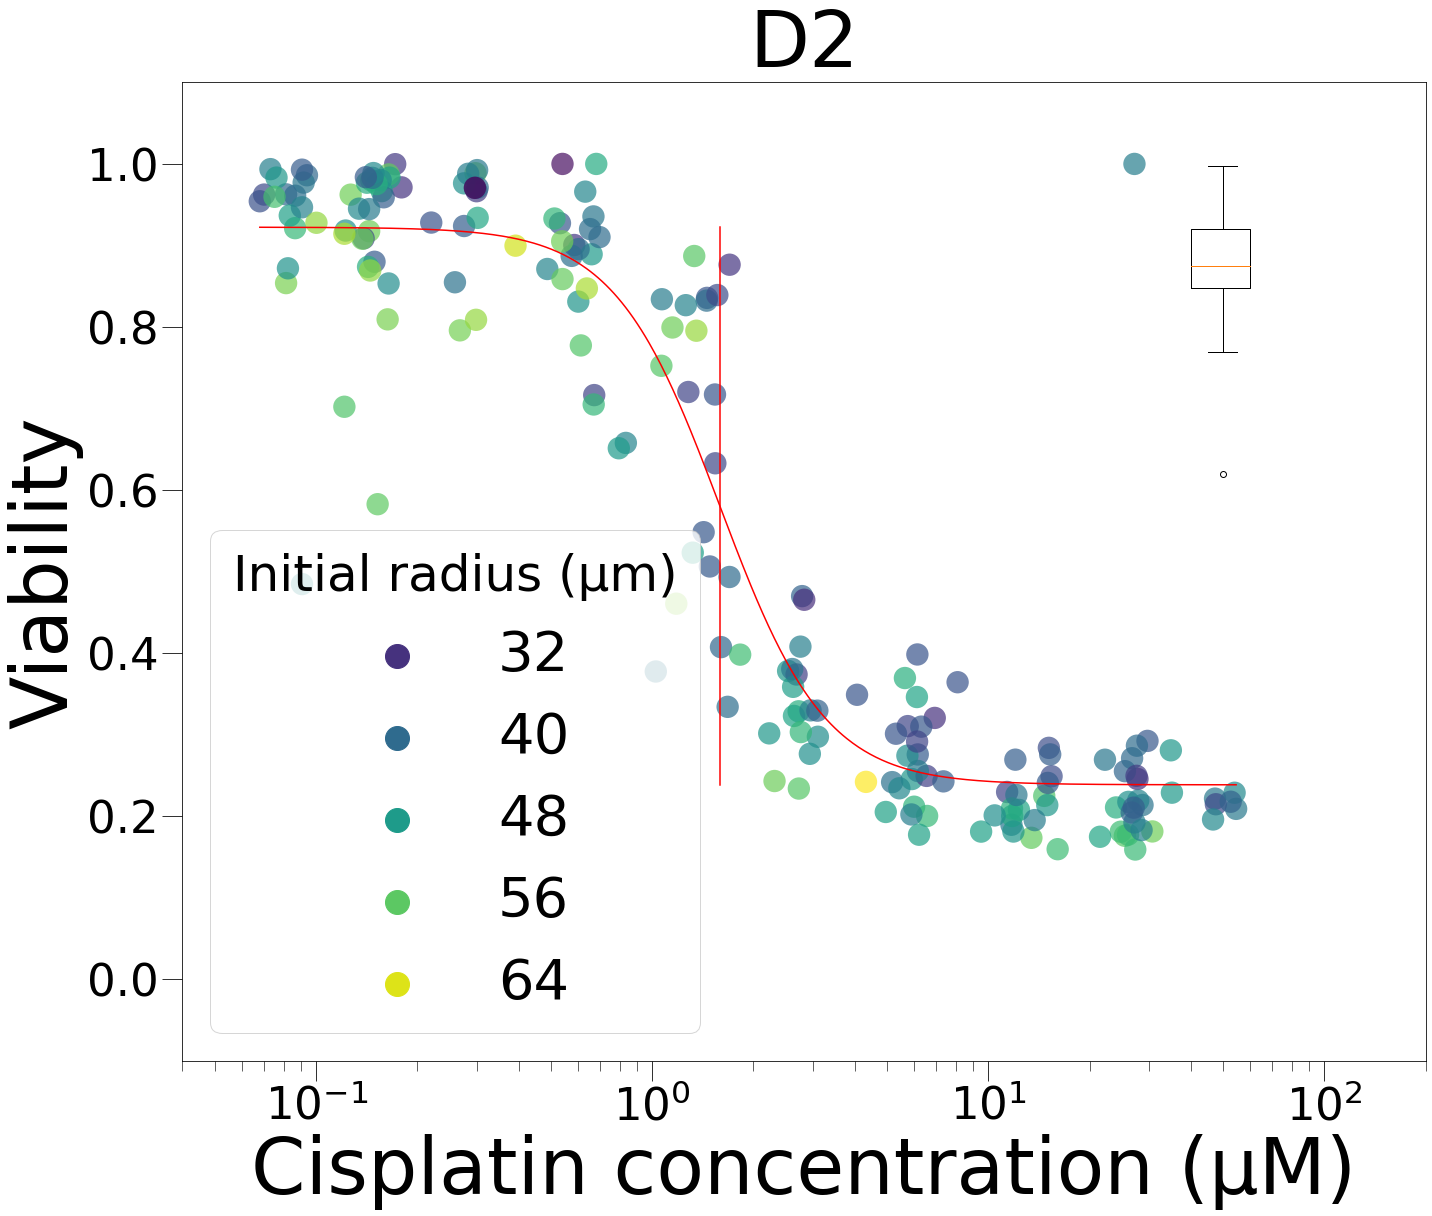

In [39]:
plot_ChipD2(dfCisFullFiltered,save=True, xlab = "Cisplatin concentration (µM)", fileName ="20221011_Chips_D2only_Cisplatin_noFit_resized_fromExcel",printFit = False)

[0.93142905 1.47805169 6.46017692 0.23146355]


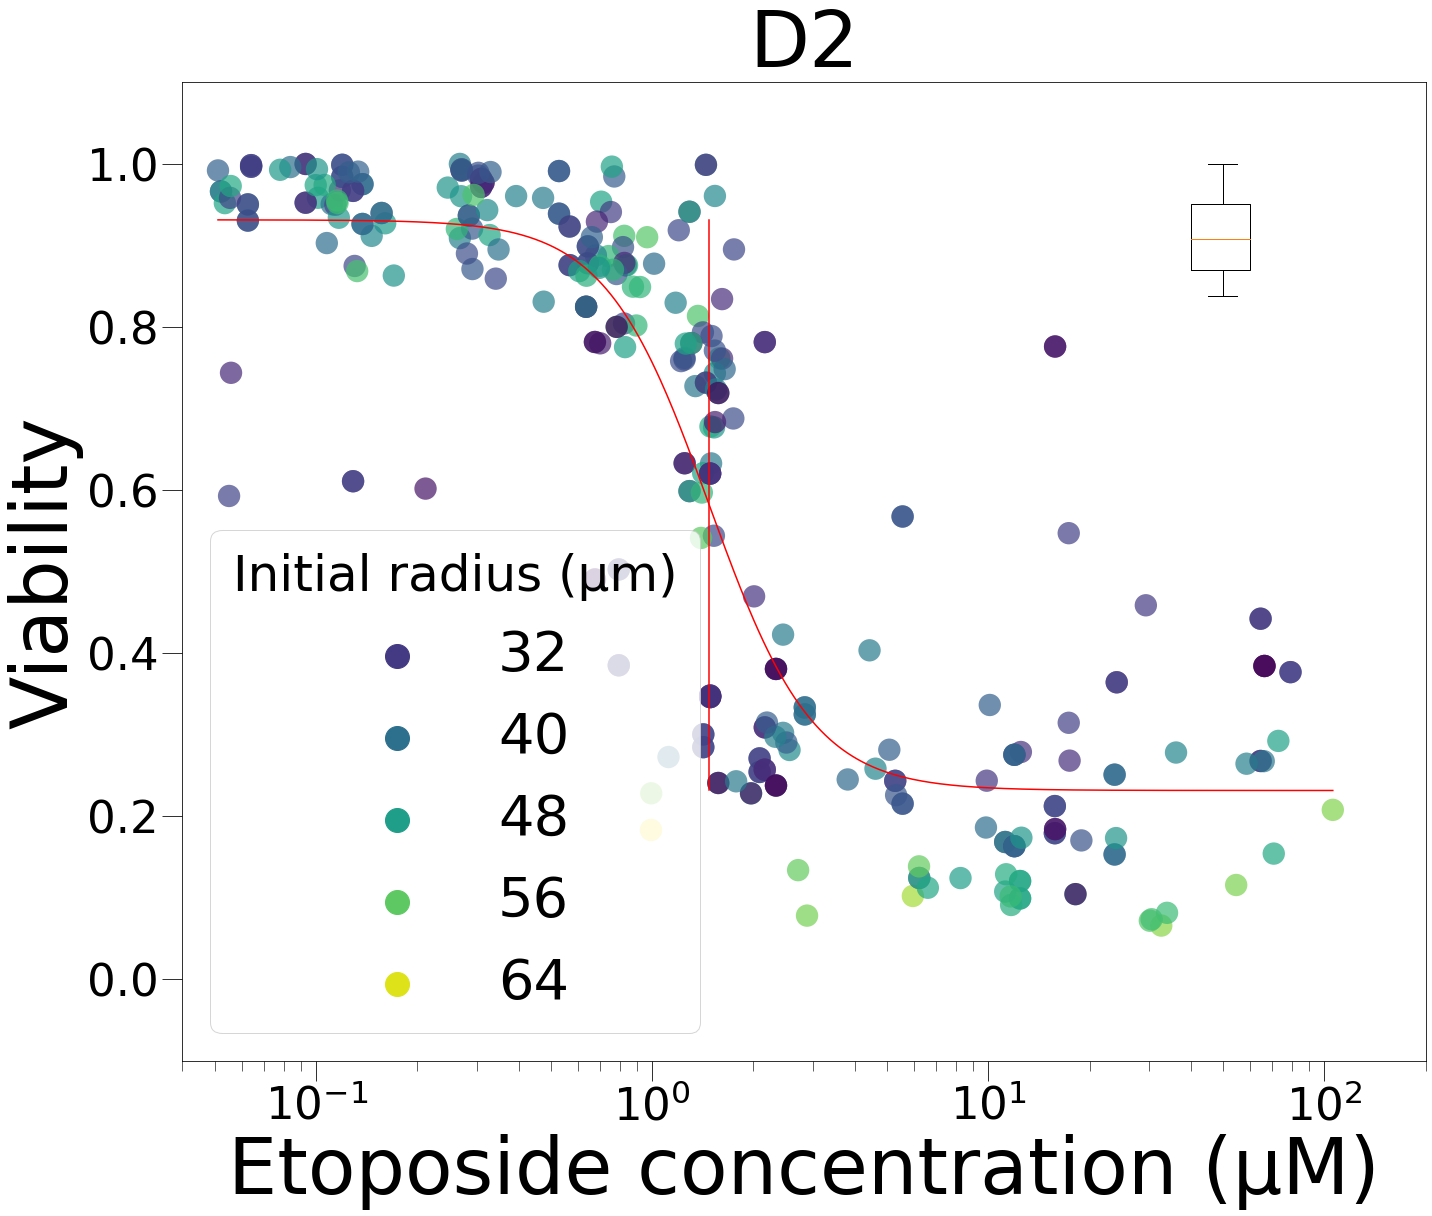

In [38]:
plot_ChipD2(dfEtoFullFiltered,save=True, xlab = "Etoposide concentration (µM)", fileName ="20221011_Chips_D2only_Etoposide_noFit_resized_fromExcel",printFit = False)

In [24]:
dfCtlEto =  dfEtoFullFiltered[dfEtoFullFiltered["control"]!=False]
dfCtlCis =  dfCisFullFiltered[dfCisFullFiltered["control"]!=False]

In [33]:
# saving the data 
dataToCSV(dfEtoFullFiltered,name="20221011_ChipEto_fromExcel")
dataToCSV(dfCisFullFiltered,name="20221011_ChipCisPlat_fromExcel")